Coeficientes da regressão de grau 1: [47626.3613042276, -0.06426665231450289]
Data prevista para atingir 110 kg: 01-01-8548


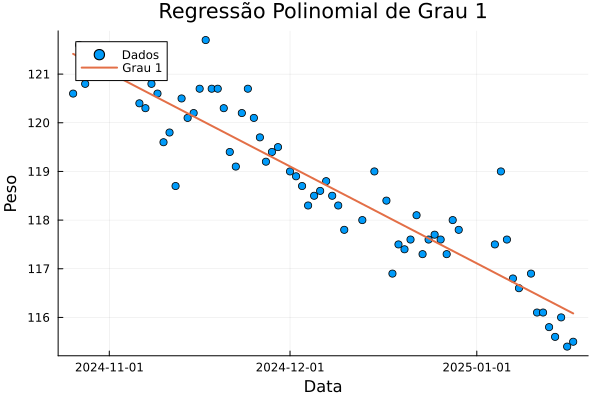

In [47]:
using Dates
using Plots

# Dados
y = [120.6, 121.6, 120.8, 121.4, 121.1, 121.1, 120.4, 120.3, 120.8, 120.6, 
     119.6, 119.8, 118.7, 120.5, 120.1, 120.2, 120.7, 121.7, 120.7, 120.7, 
     120.3, 119.4, 119.1, 120.2, 120.7, 120.1, 119.7, 119.2, 119.4, 119.5, 
     119, 118.9, 118.7, 118.3, 118.5, 118.6, 118.8, 118.5, 118.3, 117.8, 
     118, 119, 118.4, 116.9, 117.5, 117.4, 117.6, 118.1, 117.3, 117.6, 
     117.7, 117.6, 117.3, 118, 117.8, 117.5, 119, 117.6, 116.8, 116.6, 
     116.9, 116.1, 116.1, 115.8, 115.6, 116, 115.4, 115.5]

A = [Date(2024, 10, 26); Date(2024, 10, 27); Date(2024, 10, 28); Date(2024, 10, 29); 
     Date(2024, 10, 30); Date(2024, 11, 5); Date(2024, 11, 6); Date(2024, 11, 7); 
     Date(2024, 11, 8); Date(2024, 11, 9); Date(2024, 11, 10); Date(2024, 11, 11); 
     Date(2024, 11, 12); Date(2024, 11, 13); Date(2024, 11, 14); Date(2024, 11, 15); 
     Date(2024, 11, 16); Date(2024, 11, 17); Date(2024, 11, 18); Date(2024, 11, 19); 
     Date(2024, 11, 20); Date(2024, 11, 21); Date(2024, 11, 22); Date(2024, 11, 23); 
     Date(2024, 11, 24); Date(2024, 11, 25); Date(2024, 11, 26); Date(2024, 11, 27); 
     Date(2024, 11, 28); Date(2024, 11, 29); Date(2024, 12, 1); Date(2024, 12, 2); 
     Date(2024, 12, 3); Date(2024, 12, 4); Date(2024, 12, 5); Date(2024, 12, 6); 
     Date(2024, 12, 7); Date(2024, 12, 8); Date(2024, 12, 9); Date(2024, 12, 10); 
     Date(2024, 12, 13); Date(2024, 12, 15); Date(2024, 12, 17); Date(2024, 12, 18); 
     Date(2024, 12, 19); Date(2024, 12, 20); Date(2024, 12, 21); Date(2024, 12, 22); 
     Date(2024, 12, 23); Date(2024, 12, 24); Date(2024, 12, 25); Date(2024, 12, 26); 
     Date(2024, 12, 27); Date(2024, 12, 28); Date(2024, 12, 29); Date(2025, 1, 4); 
     Date(2025, 1, 5); Date(2025, 1, 6); Date(2025, 1, 7); Date(2025, 1, 8); 
     Date(2025, 1, 10); Date(2025, 1, 11); Date(2025, 1, 12); Date(2025, 1, 13); 
     Date(2025, 1, 14); Date(2025, 1, 15); Date(2025, 1, 16); Date(2025, 1, 17)]


# Converter datas para Julian Dates para regressão
A_julian = [Dates.value(date) for date in A]

# Regressão Polinomial de Grau 1
M1 = hcat(ones(length(A_julian)), A_julian)  # Matriz Nx2
c1 = y  # Vetor com os valores de y
βsol1 = M1 \ c1  # Solução (coeficientes da regressão linear)

# Exibir os coeficientes calculados
println("Coeficientes da regressão de grau 1: ", βsol1)

# Previsão da data para quando o peso for 110 kg
peso_desejado = 110.0
# Calcular o valor juliano previsto
data_juliana_prevista = (peso_desejado - βsol1[1]) / βsol1[2]
# Converter o valor juliano previsto para a data
data_base_juliana = Dates.value(A[1])
data_prevista_juliana = data_base_juliana + round(Int, data_juliana_prevista)
data_prevista = Date(data_prevista_juliana)

# Corrigir o formato da data prevista
println("Data prevista para atingir 110 kg: ", Dates.format(data_prevista, "dd-mm-yyyy"))

# Plotar os pontos e a regressão de grau 1
scatter(A, y, label="Dados", legend=:topleft, title="Regressão Polinomial de Grau 1", xlabel="Data", ylabel="Peso")
plot!(A, βsol1[1] .+ βsol1[2] .* A_julian, label="Grau 1", lw=2)

Coeficientes da regressão de grau 2: [1.747441080978933e-7, 0.06458783783632144, -8.715488208662402e-8]


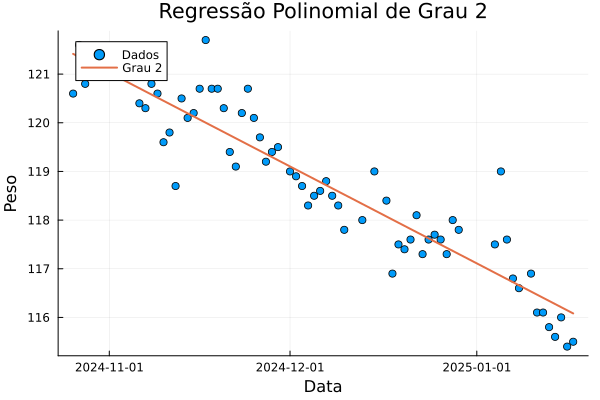

In [63]:
using Dates
using Plots

# Converter datas para Julian Dates para regressão
A_julian = [Dates.value(date) for date in A]

# Regressão Polinomial de Grau 2
# Matriz Nx3: primeira coluna é 1 (termo constante), segunda coluna é x, terceira coluna é x^2
M2 = hcat(ones(length(A_julian)), A_julian, A_julian.^2)  
c2 = y  # Vetor com os valores de y
βsol2 = M2 \ c2  # Solução (coeficientes da regressão quadrática)

# Exibir os coeficientes calculados
println("Coeficientes da regressão de grau 2: ", βsol2)

# Plotar os pontos e a regressão de grau 2
scatter(A, y, label="Dados", legend=:topleft, title="Regressão Polinomial de Grau 2", xlabel="Data", ylabel="Peso")
plot!(A, βsol2[1] .+ βsol2[2] .* A_julian .+ βsol2[3] .* A_julian.^2, label="Grau 2", lw=2)


Coeficientes da regressão de grau 2: [1.747441080978933e-7, 0.06458783783632144, -8.715488208662402e-8]
Datas previstas para atingir 110 kg: 1707-01-01 e 9363-01-01


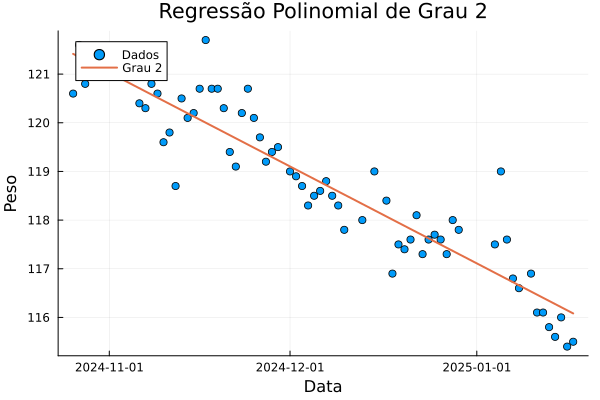

In [67]:
# Converter datas para Julian Dates para regressão
A_julian = [Dates.value(date) for date in A]

# Regressão Polinomial de Grau 2
M2 = hcat(ones(length(A_julian)), A_julian, A_julian.^2)  
c2 = y  # Vetor com os valores de y
βsol2 = M2 \ c2  # Solução (coeficientes da regressão quadrática)

# Exibir os coeficientes calculados
println("Coeficientes da regressão de grau 2: ", βsol2)

# Coeficientes
β1 = βsol2[1]
β2 = βsol2[2]
β3 = βsol2[3]

# Valor desejado
peso_desejado = 110

# Resolver a equação quadrática
Δ = β2^2 - 4 * β3 * (β1 - peso_desejado)

# Verificar se Δ é positivo (raízes reais)
if Δ >= 0
    data_juliana1 = (-β2 + sqrt(Δ)) / (2 * β3)
    data_juliana2 = (-β2 - sqrt(Δ)) / (2 * β3)
    
    # Converter data juliana de volta para formato de data
    data_prevista1 = Date(round(Int, data_juliana1))
    data_prevista2 = Date(round(Int, data_juliana2))
    
    println("Datas previstas para atingir 110 kg: ", Dates.format(data_prevista1, "yyyy-mm-dd"), " e ", Dates.format(data_prevista2, "yyyy-mm-dd"))
else
    println("Não há solução real para atingir 110 kg.")
end

# Plotar os pontos e a regressão de grau 2
scatter(A, y, label="Dados", legend=:topleft, title="Regressão Polinomial de Grau 2", xlabel="Data", ylabel="Peso")
plot!(A, βsol2[1] .+ βsol2[2] .* A_julian .+ βsol2[3] .* A_julian.^2, label="Grau 2", lw=2)